In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

import bbi
import pybedtools as pbt
import pickle
import cooler
from copy import deepcopy
import itertools 

import sys
sys.path.append("./code")

from tad_functions import *
from treg_functions import *
from hic_zscore_functions import *
from plotting_functions import *
from aux_functions import *
from init_tss_annotations import *
gpath = './annotations/chromsizes'
import statsmodels.stats
import statsmodels.stats.multitest


In [2]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [3]:
%autoreload 2

from initialize import *
import cooler

cool_wt = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/5000')
cool_ko = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/5000')

cool_wt_50kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/50000')
cool_ko_50kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/50000')

cool_wt_25kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')
cool_ko_25kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')


cool_wt_250kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/250000')
cool_ko_250kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/250000')

cooldict_25kb = {
    'wt' : cool_wt_25kb,
    'ko' : cool_ko_25kb,
}

cooldict_250kb = {
    'wt' : cool_wt_250kb,
    'ko' : cool_ko_250kb,
}


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(cool_wt_250kb)


In [4]:
from config import row_colors, columns_to_names, row_colors_dict

2


In [5]:
cooldict_50kb = {
    'wt' : cool_wt_50kb,
    'ko' : cool_ko_50kb,
}

In [6]:
import initialize
from initialize import *

gene_to_ind, ind_to_gene = initialize_genes(all_ind_to_region, all_region_to_ind)

### Compute compartments

In [7]:
from importlib import reload
import call_compartments
reload(call_compartments)
from call_compartments import *
import bbi

cooldict_250kb = {
    'wt' : cool_wt_250kb,
}

compdict = calculate_my_pcs(cooldict_250kb, all_ind_to_region, inds_to_region,
                                                       chrom_to_start, chrom_to_end)
my_wt_comp = compdict['wt']

/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(

In [8]:
def make_wrapped_plot(og_ind=66, compare_with = '3', coolcond='wt', cooldict=cooldict_25kb, l = 10):
    d = 20
    og_chrom = all_ind_to_region[og_ind][0]
    ind = (og_ind-chrom_to_start[og_chrom])*l
    m = cooldict[coolcond].matrix().fetch(og_chrom, compare_with)
    salt, ealt = chrom_to_start[compare_with], chrom_to_end[compare_with]
    
    cols = m.shape[1]
    plotsize = 500
    n = cols//500
    fig, axs = init_subplots_exact(n, n, fgsz=(10, 1), dpi=100)
    for i in range(n):
        cols,  cole = i*plotsize, i*plotsize+plotsize
        if compare_with == og_chrom:
            vmax = 3e-3
        else:
            vmax = 5e-4
        axs[i].matshow((m[ind-d:ind+d, cols:cole]), cmap='gist_heat_r', vmax = vmax, aspect='equal')
        axs[i].grid(False)
        # for col in np.where(inter_and_intra_connections[og_ind, salt:ealt])[0]:
        #     x = (col+.5)*5
        #     if (x > cols) and (x < cole):
        #         axs[i].arrow(x-cols, 35, 0, -2, color='black', head_width=8, head_length=4, width=4)
        axs[i].set_xlim([0, 500])

### Interchromosomal hub pileup

In [11]:
from config import load_pileup_variables

(goodinds, merged_clustdict, merged_inds_to_subset, 
    treg_cooldict_50kb, ind_to_gene, all_ind_to_region, my_treg_comp) = load_pileup_variables()

inter_and_intra_metadomains_treg = ( np.load('./intermediate_files/all_intra_treg_metadomains.npy')
                                   + np.load('./intermediate_files/all_inter_treg_metadomains.npy') > 0)

inter_and_intra_metadomains_tcon = ( np.load('./intermediate_files/all_intra_tcon_metadomains.npy')
                                   + np.load('./intermediate_files/all_inter_tcon_metadomains.npy') > 0)

In [12]:
df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]

acomp = np.where(my_wt_comp > .6)[0] 
acomp_df = pd.DataFrame(acomp[~np.isin(acomp, df['ind'])], columns=['ind']).iloc[::4]
acomp_df['ind'] = acomp_df['ind'].astype(int)
acomp_df['chrom'] = [all_ind_to_region[x][0] for x in acomp_df['ind'].values]
acomp_df['cluster'] = 'A comp.'

df = pd.concat([df, acomp_df], axis=0)
df = df.sort_values('ind')

df = df.reset_index().drop('index', axis=1)

In [21]:
%autoreload 2
from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

cooldict_50kb = {
    'wt' : cool_wt_50kb,
    'ko' : cool_ko_50kb,
}

metadomain_pileup_cooldict = cooldict_50kb
all_mat_dict = defaultdict(list)
all_metadata = []
padding_size = 30

ets1_all_mat_dict, ets1_all_metadata = pileup_bins_with_hub(df, metadomain_pileup_cooldict, 
                                                            chrom_to_start, inter_and_intra_metadomains_treg, 
                            inter_and_intra_metadomains_tcon, padding_size=padding_size, fetch_oe=True)

Done with 10
Done with 11
Done with 11
Done with 12
Done with 12
Done with 12
Done with 13
Done with 13
Done with 13
Done with 13
Done with 14
Done with 14
Done with 14
Done with 14
Done with 14
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with

In [22]:
bwdict = {
    'Treg H3K27ac' : bbi.open('/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/GSM.SRR5385344.H3K27ac_ChIP-seq_of_Treg_replicate_2.bw')
}

### Figure 4H

file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
(171, 39, 39)
(171, 39, 39)
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
(271, 39, 39)
(271, 39, 39)
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
(43, 39, 39)
(43, 39, 39)
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
(721, 39, 39)
(721, 39, 39)


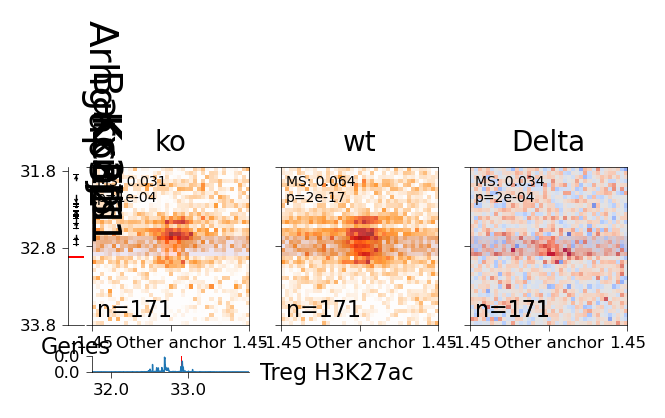

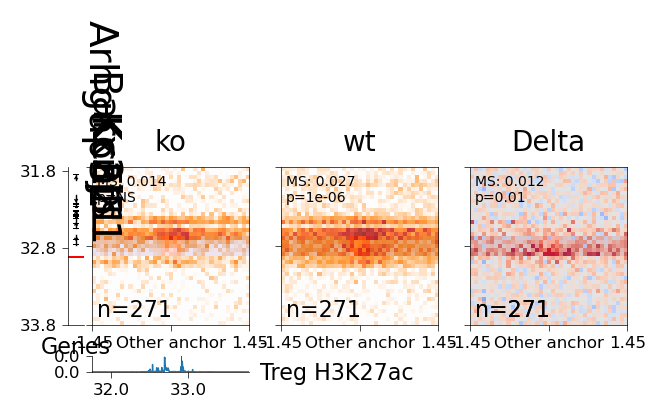

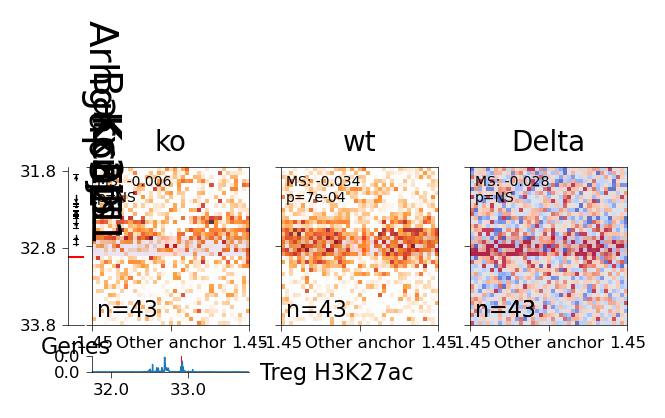

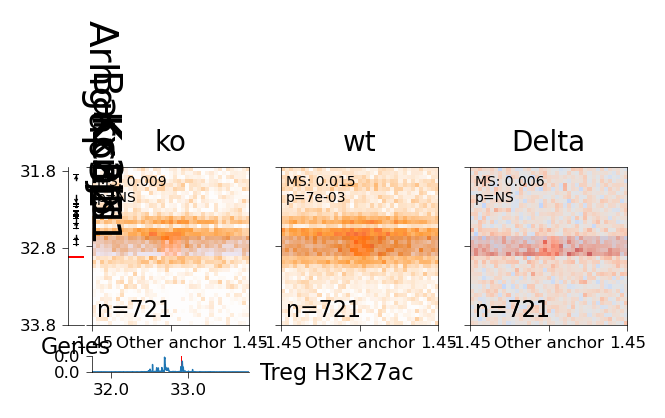

In [26]:
from hub_pileup import *

ind = 5217
ms = []
name = 'Ets1'
for cluster in [4, 0, 18, 'A comp.']:
    idx = ( ((ets1_all_metadata['ind1']==ind) & (ets1_all_metadata['cluster2']==cluster)) | 
            ((ets1_all_metadata['ind2']==ind) & (ets1_all_metadata['cluster1']==cluster))
          )
    rows = []
    keys = [ 'wt',  'ko']
    keys = [ 'ko',  'wt']

    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    plt.sca(axs[0])

    base = (5217-chrom_to_start['9'])*5
    l1, l2 = (base - 30 + 10)*50_000, (base + 31 - 10)*50_000
    place = ('9', l1, l2)
    newax = add_GTF_to_L_axis(place, plt.gca(), ignore_set = {},
                             skip_rik = True,
                             skip_gm = True)
    newax.set_ylim([l2, l1])
    newax.set_xlim([-1, 1])
    newax.axhspan(32928966, 32904069, color='red', linewidth=0)
    newax.grid(False)
    
    newax = add_bigwig_to_axis(place, bwdict, plt.gca(), basey=-.3)[0]
    
    newax.axvspan(32928966, 32904069, color='red', linewidth=0)
    newax.set_xlim([l1, l2])
    newax.set_yticks([0, 80])
    newax.grid(False)

    for c, key in enumerate(keys):
        plt.sca(axs[c])
        mats = (ets1_all_mat_dict[key])[idx][:, 10:-10, 10:-10]
        print(mats.shape)
        plot_pileup_mat(mats, axs[c], cmap = 'gist_heat_r', vmin=-.05, vmax=.25,
                       show_filts=True, method='center_square')
        m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
        ms.append(m)
        n = len(m)//2
        plt.grid(False)
        plt.sca(axs[c])
        plt.title(f'{key}')
    plt.sca(axs[2])
    mats = (ets1_all_mat_dict['wt'][idx] - ets1_all_mat_dict['ko'][idx])[:, 10:-10, 10:-10]
    plot_pileup_mat(mats,  axs[2], cmap = 'coolwarm', vmin=-.1, vmax=.1,
                   show_filts=True, method='center_square')
    m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
    ms.append(m)

    plt.title("Delta")
    plt.grid(False)
    plt.text(.03, .05, f'n={idx.sum()}', transform=axs[2].transAxes, fontsize=8)
    
    x1, x2 = all_ind_to_region[5217][1], all_ind_to_region[5217][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    for c, a in enumerate(axs):
        plt.sca(axs[c])

        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels(['', '', ''])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')

        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])

        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)
    fig.savefig(f'./plots/GOLNAZ/ets1_ko_{cluster}.pdf', bbox_inches='tight')

### Figure 4I

In [27]:
cooldict_250kb = {
    'wt' : cool_wt_250kb,
    'ko' : cool_ko_250kb,
}

In [28]:
%autoreload 2
from construct_oe_mat import *

ets1_oe_mat_dict = construct_oe_mat_dict(cooldict_250kb, all_ind_to_region, 
                                            parsed_chroms, chrom_to_start, chrom_to_end, verbose=True, )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with wt
Done with ko


In [29]:
from compute_differential_hic_hub import *

acomp = np.where(my_wt_comp > .6)[0][::4]
acomp_df = pd.DataFrame(acomp[~np.isin(acomp, df['ind'])], columns=['ind'])
hub_dict = {
    'Active 1' : goodinds[merged_clustdict['all']==0],
    'Active 2' : goodinds[merged_clustdict['all']==4],
    'Repressive' : goodinds[merged_clustdict['all']==18],
    # 'A comp' : acomp_df['ind'].values
}

comps = [
    ['wt', 'ko'],
]
comp1, comp2 = comps[0]
tstat_df, stat_df, pval_df, raw_pval_df, meta = get_differential_hic(
                     ets1_oe_mat_dict[comp1],
                     ets1_oe_mat_dict[comp2],
                     hub_dict, all_ind_to_region, m = 3, center = 0, cliplo=-100, cliphigh=100, method = 'center_square',
)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:75: RuntimeWarning: Mean of empty slice
  v_middle = np.nanmean(ms_treg[:, inside_filt], axis=1)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:76: RuntimeWarning: Mean of empty slice
  v_outside = np.nanmean(ms_treg[:, outside_filt], axis=1)
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:129: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(v_middle.clip(cliplo, cliphigh)) - np.nanmean(v_outside.clip(cliplo, cliphigh))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:75: RuntimeWarning: Mean of empty slice
  v_middle = np.nanmean(ms_treg[:, inside_filt], axis=1)
/Genomics/prity

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = '42'
# plt.rcParams['svg.fonttype'] = '42'

/Genomics/pritykinlab/gabe/jupys/tregs/./code/volcano_plot.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(x, y, zorder = 3, c = colors, linewidth=0, s = s, rasterized=rasterized, vmin=vmin, vmax=vmax, alpha=alpha)


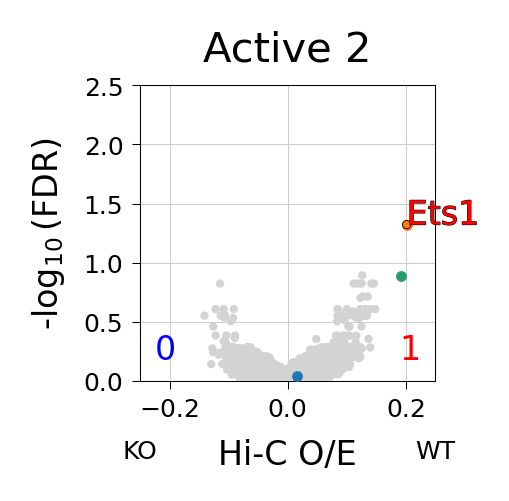

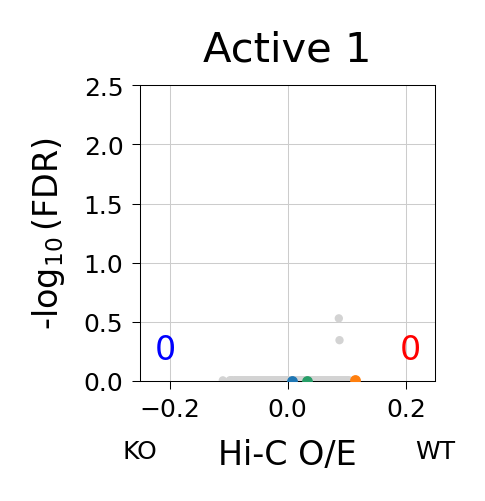

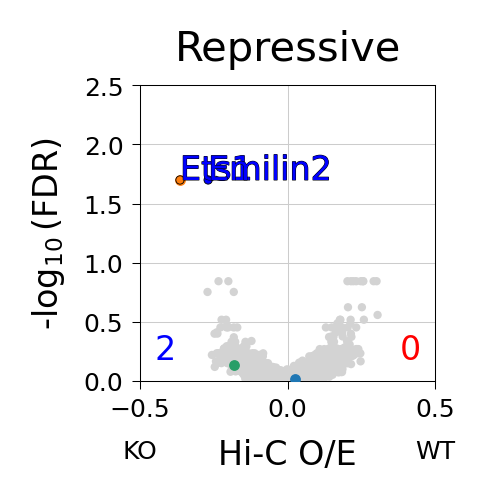

In [31]:
from volcano_plot import *

names = pd.Series([get_name(x, ind_to_gene) for x in pval_df.index], pval_df.index)

pco = .01
stat_co = .1
xlims = [[-.25, .25], [-.25, .25], [-.5, .5]]
for c, col in enumerate(['Active 2', 'Active 1', 'Repressive']):
    fig, axs = init_subplots_exact(1, 1, fgsz=(25*mm, 25*mm), dpi = 150, xspace=1.4)
    plt.sca(axs)
    volcano_plot(stat_df[col], pval_df[col], names, plt.gca(),
                 label_pval_cutoff = -np.log10(.05),
                 pco = .05,
                 lfc_co = 0,
                 label_lfc_cutoff = 0, up_color='red', down_color='blue',
                 ylim=[0, 2.5], do_adjust_text = False
                )
    inds = [5216, 5217, 6058]
    for ind in inds:
        plt.scatter(stat_df.loc[ind, col], -np.log10(pval_df.loc[ind, col]), zorder=3, s=5)
    plt.xlim(xlims[c])
    # plt.ylim([-.5, yticks[c][-1]+1])
    plt.xlabel("Hi-C O/E")
    add_xaxis_labels('KO', 'WT', axs, fontsize=6, y=-.2, )
    plt.title(col)
    plt.gca().set_axisbelow(True)
    name = col.replace(" ", "_")
    fig.savefig(f'./plots/paper/fig4/ets1_{name}_volcano.svg', bbox_inches = 'tight', dpi=1000)